In [32]:
#!pip install category_encoders
import pandas as pd 

import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score


from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.inspection import permutation_importance


from IPython.display import Image
from IPython.core.display import HTML 

url = 'https://raw.githubusercontent.com/RWStricker/youtube/master/USvideos.csv'

USvids = pd.read_csv(url)


In [27]:
#Wrangle function
def wrangle(USvids):
  df = USvids = pd.read_csv(url, parse_dates=['publish_time'], index_col='publish_time').sort_index()


  threshold = 25
  high_cardinality_columns = [col for col in df.select_dtypes('object').columns if df[col].nunique() > threshold] 
  df = df.drop(columns=high_cardinality_columns)


  constant_columns = [col for col in df.columns if df[col].nunique() == 1]
  df = df.drop(columns=constant_columns)

  df = df.drop(columns=['ratings_disabled', 'video_error_or_removed', 'comments_disabled'])
  return df

df = wrangle(USvids)

In [30]:

y = df['category_id']
X = df.drop(columns=['category_id'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42)
df

,category_id,views,likes,dislikes,comment_count
publish_time,,,,,
2006-07-23 08:24:11+00:00,24,258506,459,152,82
2008-04-05 18:22:40+00:00,1,50030,46,6,26
2008-04-05 18:22:40+00:00,1,50117,46,6,26
2008-04-05 18:22:40+00:00,1,49942,46,6,26
2008-04-05 18:22:40+00:00,1,50168,46,6,26
...,...,...,...,...,...
2018-06-13 15:06:08+00:00,17,812832,7701,320,2505
2018-06-13 16:00:01+00:00,10,1473589,214511,2011,17455
2018-06-13 16:00:24+00:00,10,296615,38671,463,2348


In [31]:
print("Baseline Accuracy", y_train.value_counts(normalize=True).max())

Baseline Accuracy 0.24360992022575567


In [38]:
model_lr = make_pipeline(
    SimpleImputer(strategy='mean'),
    LinearRegression()
)

model_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [41]:
model_tree = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)

model_tree.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(boo...=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                         

In [43]:
model_xgb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier()
)

model_xgb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('gradientboostingclassifier',
                 GradientBoostingClassi...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_sa

In [44]:
df

,category_id,views,likes,dislikes,comment_count
publish_time,,,,,
2006-07-23 08:24:11+00:00,24,258506,459,152,82
2008-04-05 18:22:40+00:00,1,50030,46,6,26
2008-04-05 18:22:40+00:00,1,50117,46,6,26
2008-04-05 18:22:40+00:00,1,49942,46,6,26
2008-04-05 18:22:40+00:00,1,50168,46,6,26
...,...,...,...,...,...
2018-06-13 15:06:08+00:00,17,812832,7701,320,2505
2018-06-13 16:00:01+00:00,10,1473589,214511,2011,17455
2018-06-13 16:00:24+00:00,10,296615,38671,463,2348


In [46]:
print(model_lr.score(X_train, y_train))
print(model_lr.score(X_val, y_val))

0.04231746898548405
0.0405247081814164


In [48]:
print(model_tree.score(X_train, y_train))
print(model_tree.score(X_val, y_val))

0.9996472567428231
0.724053724053724


In [49]:
print(model_xgb.score(X_train, y_train))
print(model_xgb.score(X_val, y_val))

0.44334400607803764
0.3848595848595849


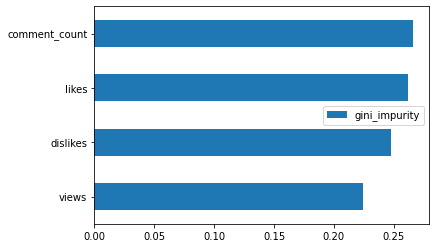

In [54]:
importances = model_tree.named_steps['randomforestclassifier'].feature_importances_

gini_imp = pd.DataFrame(data=importances, index=X_val.columns, columns=['gini_impurity']).sort_values(by='gini_impurity')

gini_imp.tail(10).plot(kind='barh');